In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [7]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [10]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [11]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [12]:
X_test.shape

(10000, 28, 28)

# Data Visualization


In [18]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])
    print(y_train[index])

5


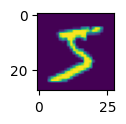

In [19]:
plot_sample(0)

0


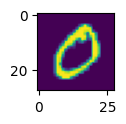

In [20]:
plot_sample(1)


# Preprocessing: Scale images

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Using ANN for classification

In [37]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7758 - accuracy: 0.8180
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4543 - accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4021 - accuracy: 0.8924
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3761 - accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3594 - accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3477 - accuracy: 0.9035
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3387 - accuracy: 0.9064
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3318 - accuracy: 0.9080
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3260 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.321

In [27]:
model.evaluate(X_test_scaled , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1587 - accuracy: 0.9536


[0.1587120145559311, 0.9535999894142151]

Let's make some predictions

In [33]:
y_pred = np.array( list(map( lambda x : np.argmax( x) ,  model.predict(X_test_scaled))))

313/313 [==============================] - 1s 3ms/step


------------------------

classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.95       982
           5       0.97      0.92      0.94       892
           6       0.95      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

------------------------


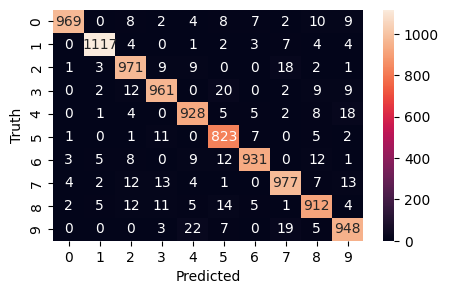

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn
def model_evaluation(y_test , y_pred):
    print('------------------------')
    print('\nclassification Report')
    print(classification_report(y_test,y_pred))


    print('------------------------')
    cm = confusion_matrix(y_pred,y_test)
    plt.figure(figsize = (5,3))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
model_evaluation(y_test , y_pred)

# Using CNN for classification

In [43]:
X_train_scaled.shape , X_train_scaled.reshape(-1,28,28,1).shape

((60000, 28, 28), (60000, 28, 28, 1))

In [45]:
cnn_model = keras.Sequential( [
    keras.layers.Conv2D(10 , (3,3) , activation = 'relu' , input_shape = (28 , 28 , 1)) ,
    keras.layers.MaxPooling2D((2,2)) ,
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5237 - accuracy: 0.8384
Epoch 2/5
 301/1875 [===>..........................] - ETA: 18s - loss: 0.2272 - accuracy: 0.9369

In [ ]:
cnn_model.evaluate(X_test_scaled,y_test)